In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams.update({'font.size':16})
plt.rcParams["figure.figsize"] = (8,5)

In [247]:
for parameter in ('ph','coliformes', 'dbo','fosforo','od','solido','temperatura','turbidez'):
        
    #print(parameter)
    # Carregando a base de dados:
    
    df = pd.read_csv(parameter + '.csv',encoding='utf-8',sep=';')[['data_coleta', 'valor','UGRHI']]
    
    df = df.loc[df['UGRHI'] == '06 - ALTO TIÊTE']
    #df = df.loc[df['UGRHI'] == '10 - SOROCABA/MEDIO TIETE']

    df['data_coleta'] = pd.to_datetime(df['data_coleta'])
    df.index = df['data_coleta']
    df = df.groupby([pd.Grouper(freq='1M')]).mean().reset_index()
    df.columns = ['data_coleta',parameter]
    
    if (parameter == 'ph'):
        DFmerge = df
    else:
        DFmerge = pd.merge(DFmerge, df,how="outer", on="data_coleta")
   #DFmerge.to_csv (r'C:\Users\Anderson\predicaoagua\src\src_experimentos_dissertação_log\Concatenacao_dados_cetesb\nova_concatenacao\UGRHI10.csv', index = True, header=True)
DFmerge

,data_coleta,ph,coliformes,dbo,fosforo,od,solido,temperatura,turbidez
0,1978-01-31,6.415254,861918.050847,22.0,34.907034,3.390909,334.237288,21.322034,59.288136
1,1978-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1978-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1978-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1978-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
498,2019-07-31,7.340000,NaN,63.5,2.760000,2.230000,358.000000,22.550000,161.000000
499,2019-08-31,7.370000,NaN,95.0,2.020000,1.700000,328.000000,28.400000,30.100000
500,2019-09-30,6.827000,NaN,10.6,0.650000,1.320000,228.400000,25.060000,43.568000
501,2019-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


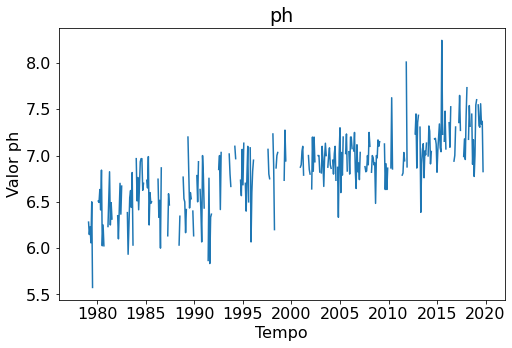

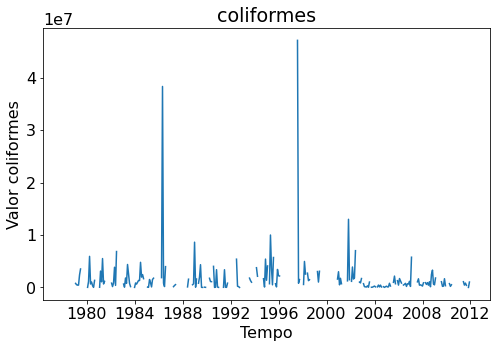

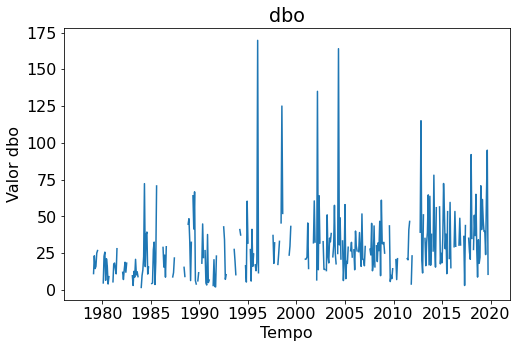

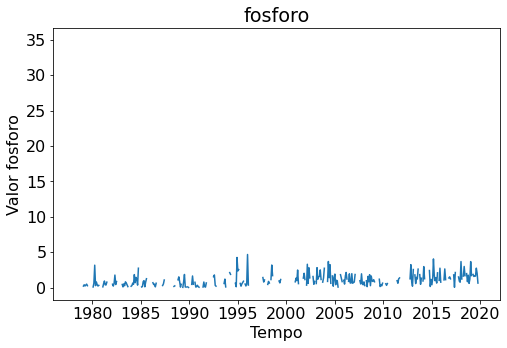

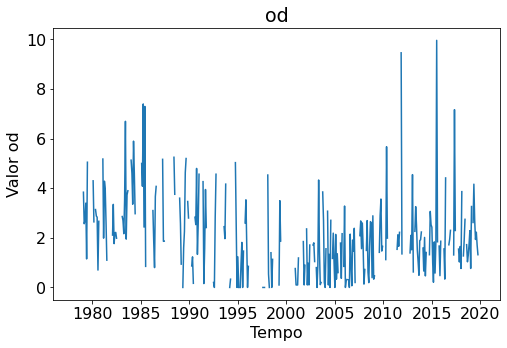

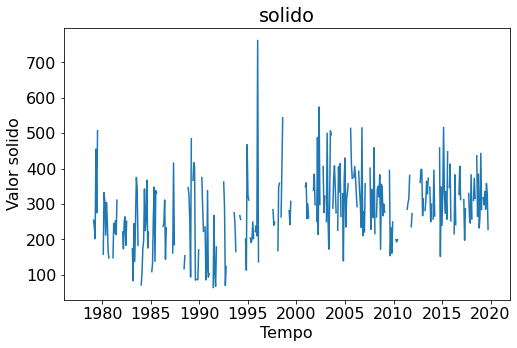

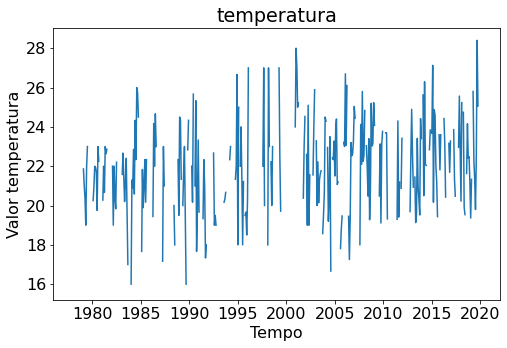

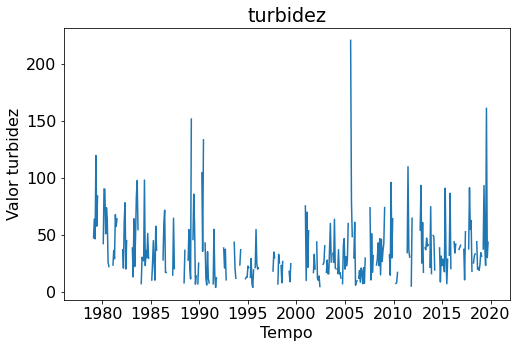

In [248]:
df06 = DFmerge
df06=df06.set_index('data_coleta')
#Mostra os dados dos parâmetros graficamente.
for c in df06.columns:
    plt.plot(df06[c])
    plt.title(c)
    plt.xlabel('Tempo')
    plt.ylabel('Valor ' + c)
    plt.show()


UGRHI06 - APÓS O MERGE


C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.1%

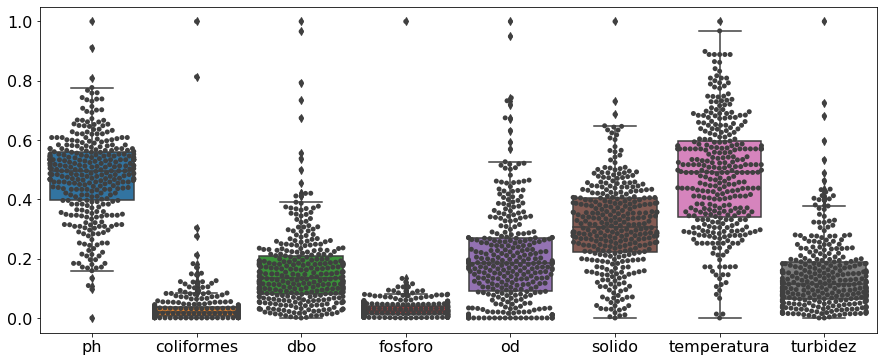

In [250]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
df06_padronizado = sc.fit_transform(df06)

ph          = []
coliformes  = []
dbo         = []
fosforo     = []
od          = []
solido      = []
temperatura = []
turbidez    = []

for i in range(0,8):#coluna
    for j in range(0,len(df06_padronizado)): #linha
        if (i == 0):
            ph.append(df06_padronizado[j][i]) 
        elif (i == 1):
            coliformes.append(df06_padronizado[j][i])
        elif (i == 2):
            dbo.append(df06_padronizado[j][i])
        elif (i == 3):
            fosforo.append(df06_padronizado[j][i])
        elif (i == 4):
            od.append(df06_padronizado[j][i])
        elif (i == 5):
            solido.append(df06_padronizado[j][i])
        elif (i == 6):
            temperatura.append(df06_padronizado[j][i])
        else:
            turbidez.append(df06_padronizado[j][i])

dict = {'ph':ph,'coliformes':coliformes,'dbo':dbo,'fosforo':fosforo,'od':od,'solido':solido,'temperatura':temperatura,'turbidez':turbidez}

df06_pad = pd.DataFrame(dict)
print("UGRHI06 - APÓS O MERGE")
#ax = sns.violinplot(data=df06_pad,inner="point")
ax = sns.boxplot(data=df06_pad)
ax = sns.swarmplot(data=df06_pad, color=".25")
plt.rcParams["figure.figsize"] = (15,6)



In [251]:
df06 = df06.interpolate()

Série temporal de cada parâmetro após a interpolação.


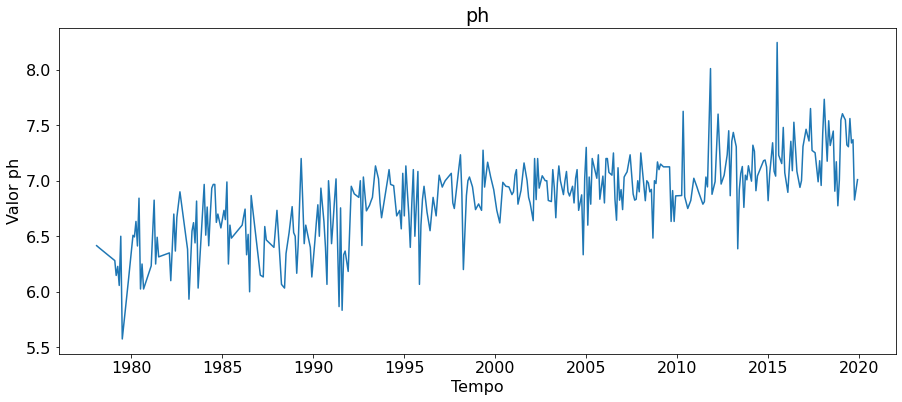

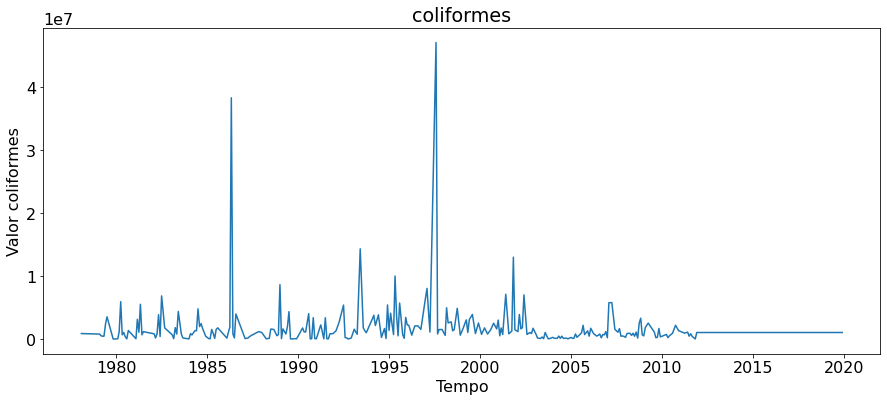

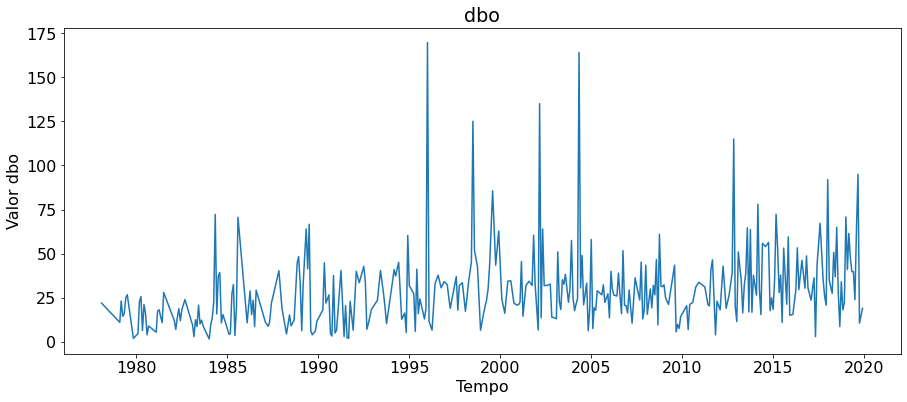

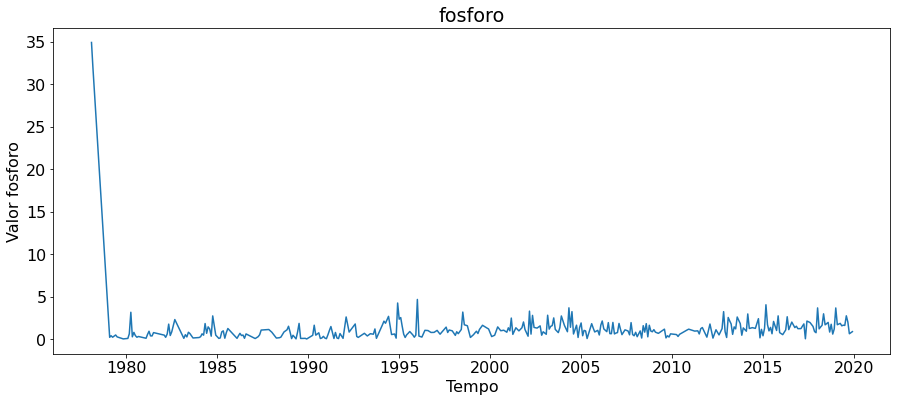

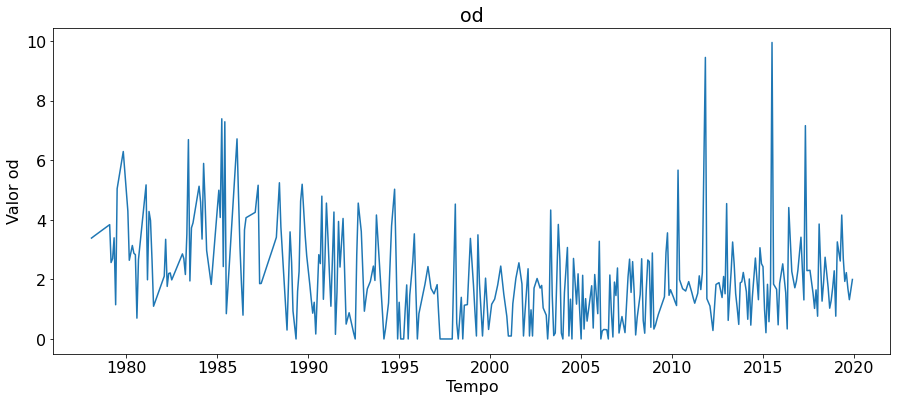

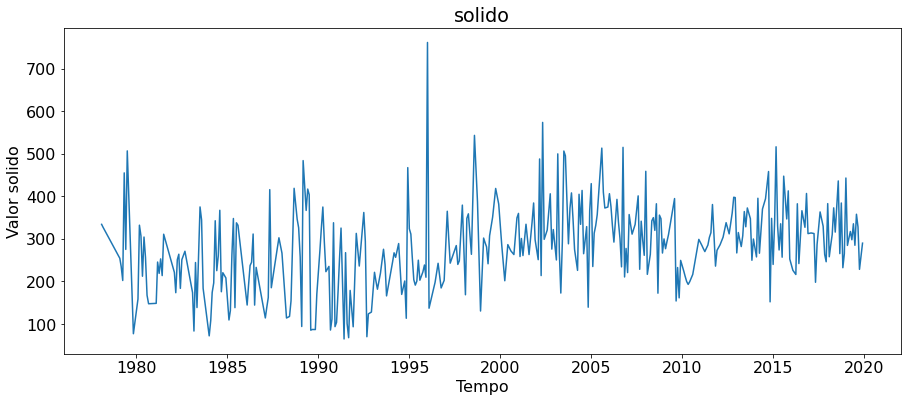

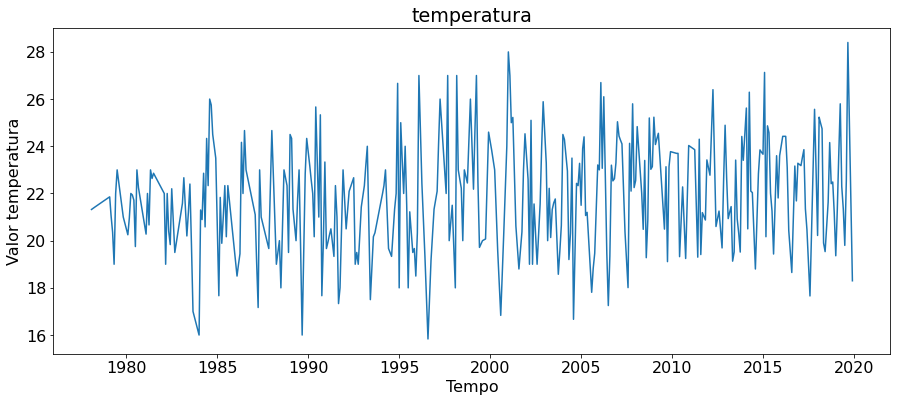

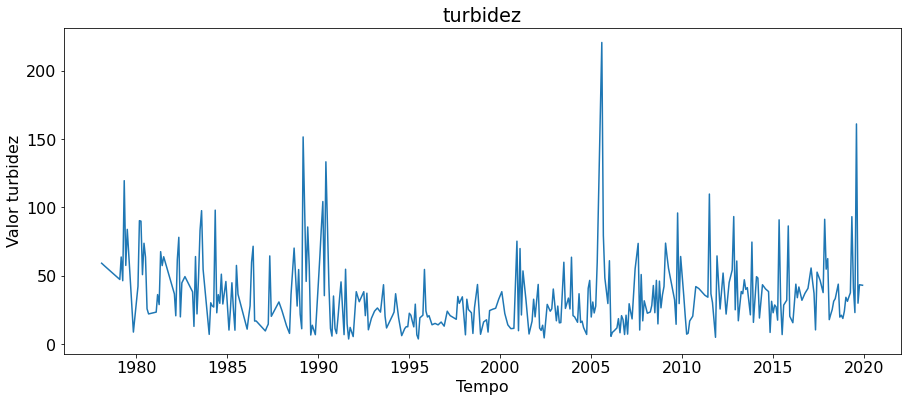

In [252]:
#Mostra os dados dos parâmetros graficamente.
print('Série temporal de cada parâmetro após a interpolação.')
for c in df06.columns:
    plt.plot(df06[c])
    plt.title(c)
    plt.xlabel('Tempo')
    plt.ylabel('Valor ' + c)
    plt.show()

In [253]:
df06.describe()

,ph,coliformes,dbo,fosforo,od,solido,temperatura,turbidez
count,503.000000,5.030000e+02,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,6.817440,1.739446e+06,27.701570,1.443927,2.152701,276.298608,21.762686,34.662998
std,0.368310,3.601846e+06,19.466259,3.237145,1.523580,93.061837,2.177378,24.458569
min,5.575000,7.900000e+01,1.666667,0.036667,0.000000,64.666667,15.833333,3.966667
25%,6.579167,6.935514e+05,15.627137,0.506500,1.135069,216.388889,20.250000,18.902877
50%,6.865000,1.027826e+06,24.000000,0.894100,1.911624,275.250000,21.714286,29.400000
75%,7.050000,1.598752e+06,34.038462,1.395952,2.846667,332.833333,23.190000,43.900000
max,8.245000,4.713333e+07,169.666667,34.907034,9.965000,762.000000,28.400000,220.477778


In [254]:
print('Substitui o valor minimo zerado do parâmetro OD pelo seu valor medio.')
    
df06.loc[df06['od'] == 0, 'od'] = df06.mean().od

print('TRANSFORMAÇÃO DOS VALORES DO PARÂMETRO COLIFORMES PARA LOG10.')

def tranforma_log(valores_parametro):
    
    valores_log = []
    
    for i in range(len(valores_parametro)):
        
        valores_log.append(math.log10(valores_parametro[i]+1))
        
    return valores_log

df06['coliformes'] = tranforma_log(df06['coliformes'])

df06.describe()

Substitui o valor minimo zerado do parâmetro OD pelo seu valor medio.
TRANSFORMAÇÃO DOS VALORES DO PARÂMETRO COLIFORMES PARA LOG10.


,ph,coliformes,dbo,fosforo,od,solido,temperatura,turbidez
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,6.817440,5.919975,27.701570,1.443927,2.263974,276.298608,21.762686,34.662998
std,0.368310,0.621087,19.466259,3.237145,1.438358,93.061837,2.177378,24.458569
min,5.575000,1.903090,1.666667,0.036667,0.066667,64.666667,15.833333,3.966667
25%,6.579167,5.841078,15.627137,0.506500,1.333333,216.388889,20.250000,18.902877
50%,6.865000,6.011920,24.000000,0.894100,2.037500,275.250000,21.714286,29.400000
75%,7.050000,6.203781,34.038462,1.395952,2.846667,332.833333,23.190000,43.900000
max,8.245000,7.673328,169.666667,34.907034,9.965000,762.000000,28.400000,220.477778


UGRHI06 - APÓS A INTERPOLAÇÃO E SUBSTITUIÇÃO DO VALOR ZERADO DE OD PELO VALOR MEDIO.


C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.7

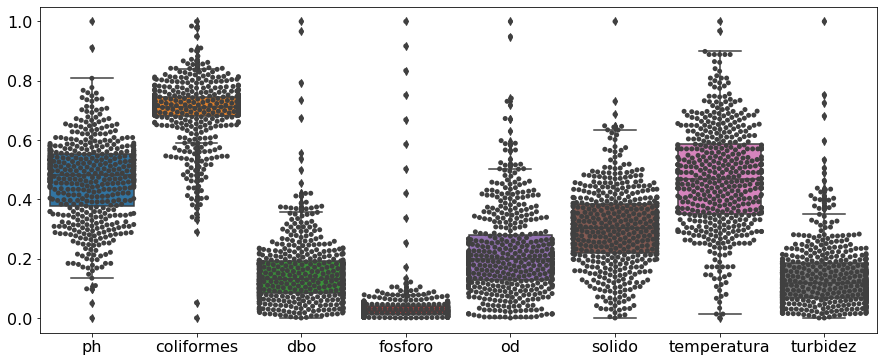

In [255]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
df06_padronizado = sc.fit_transform(df06)

ph          = []
coliformes  = []
dbo         = []
fosforo     = []
od          = []
solido      = []
temperatura = []
turbidez    = []

for i in range(0,8):#coluna
    for j in range(0,len(df06_padronizado)): #linha
        if (i == 0):
            ph.append(df06_padronizado[j][i]) 
        elif (i == 1):
            coliformes.append(df06_padronizado[j][i])
        elif (i == 2):
            dbo.append(df06_padronizado[j][i])
        elif (i == 3):
            fosforo.append(df06_padronizado[j][i])
        elif (i == 4):
            od.append(df06_padronizado[j][i])
        elif (i == 5):
            solido.append(df06_padronizado[j][i])
        elif (i == 6):
            temperatura.append(df06_padronizado[j][i])
        else:
            turbidez.append(df06_padronizado[j][i])

dict = {'ph':ph,'coliformes':coliformes,'dbo':dbo,'fosforo':fosforo,'od':od,'solido':solido,'temperatura':temperatura,'turbidez':turbidez}

df06_pad = pd.DataFrame(dict)
print("UGRHI06 - APÓS A INTERPOLAÇÃO E SUBSTITUIÇÃO DO VALOR ZERADO DE OD PELO VALOR MEDIO.")
#ax = sns.violinplot(data=df06_pad,inner="point")
ax = sns.boxplot(data=df06_pad)
ax = sns.swarmplot(data=df06_pad, color=".25")
plt.rcParams["figure.figsize"] = (15,6)


In [256]:
#Funções que calculam os valores superior e inferior do boxplot. Também calcula o valor médio dos parâmetros.
def outlier_superior(vparametro,df):
    #Ordena o dataframe
    trainingds = df.sort_values(vparametro,axis=0)

    tamanho = len(trainingds)
   
    #Calcula o 1Q, ou seja, os primeiros 25% do diagrama de caixa.
    primeiro_quartil = trainingds.quantile(q=0.25, axis=0, numeric_only=True, interpolation='linear')
    #Calcula o 3Q, ou seja, 75% do diagrama de caixa.
    terceiro_quartil = trainingds.quantile(q=0.75, axis=0, numeric_only=True, interpolation='linear')

    #Calcula-se o interquartil(FIQ).
    fig = terceiro_quartil - primeiro_quartil
    
    #Calcula o limite superior.
    superior = terceiro_quartil + (1.5*fig)
    
    return superior

def outlier_inferior(vparametro,df):
    #Ordena o dataframe
    trainingds = df.sort_values(vparametro,axis=0)

    tamanho = len(trainingds)
    
    #Calcula o 1Q, ou seja, os primeiros 25% do diagrama de caixa.
    primeiro_quartil = trainingds.quantile(q=0.25, axis=0, numeric_only=True, interpolation='linear')
    #Calcula o 3Q, ou seja, 75% do diagrama de caixa.
    terceiro_quartil = trainingds.quantile(q=0.75, axis=0, numeric_only=True, interpolation='linear')
      
    #Calcula-se o interquartil(FIQ).
    fig = terceiro_quartil - primeiro_quartil
    
    #Calcula o limite inferior.
    inferior = primeiro_quartil - (1.5*fig)
           
    return inferior

def media_coluna(vparametro,df):
    tamanho = len(df)
    
    soma = 0
    
    for i in range(tamanho):
        soma = soma + df[vparametro][i]
    
    #calcula o Valor medio da coluna
    media = soma / tamanho
        
    return media

def mediana_coluna(vparametro,df):
    
    mediana = df.median().vparametro
            
    return mediana

Dados da UGRHI 06


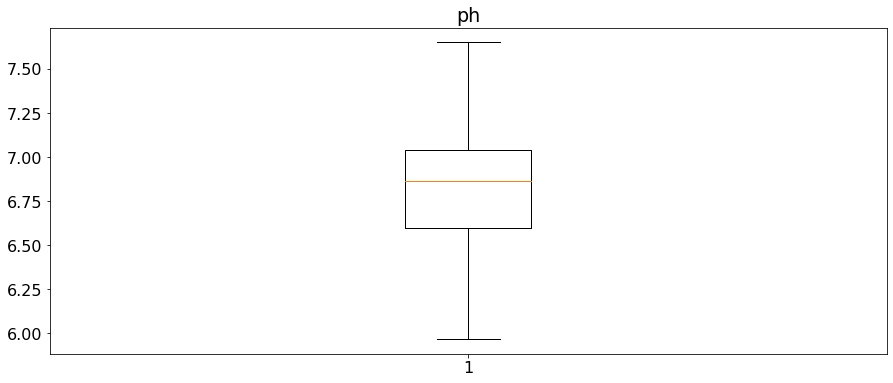

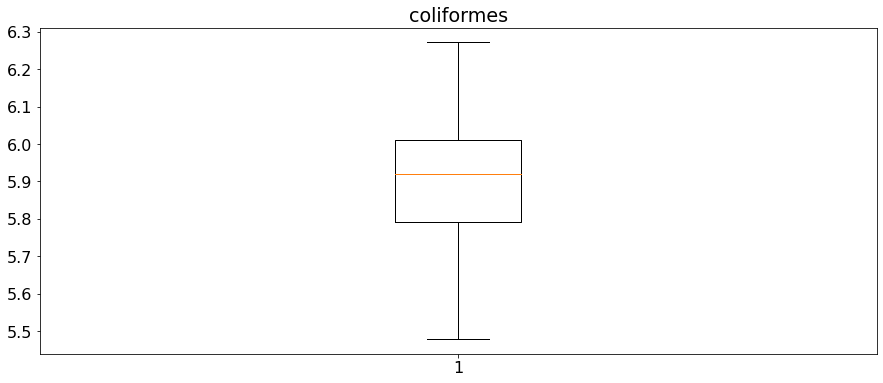

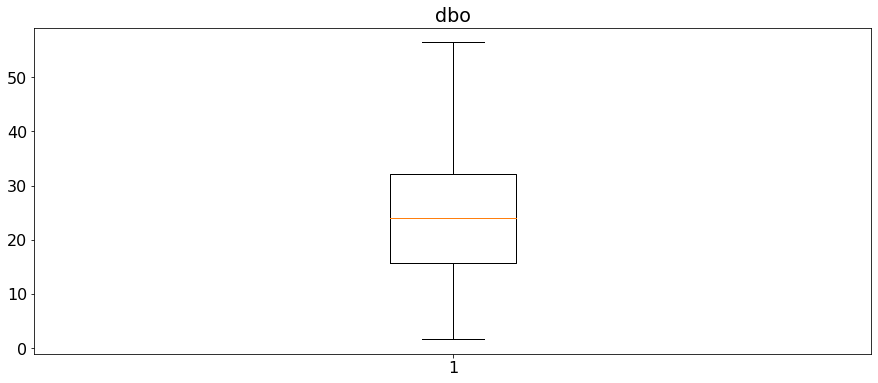

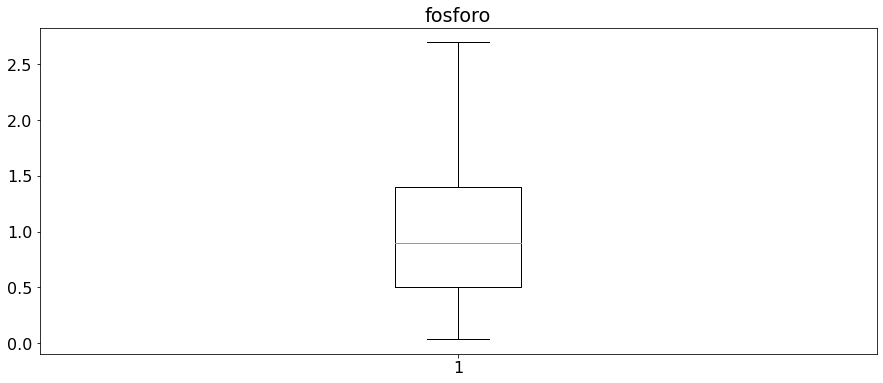

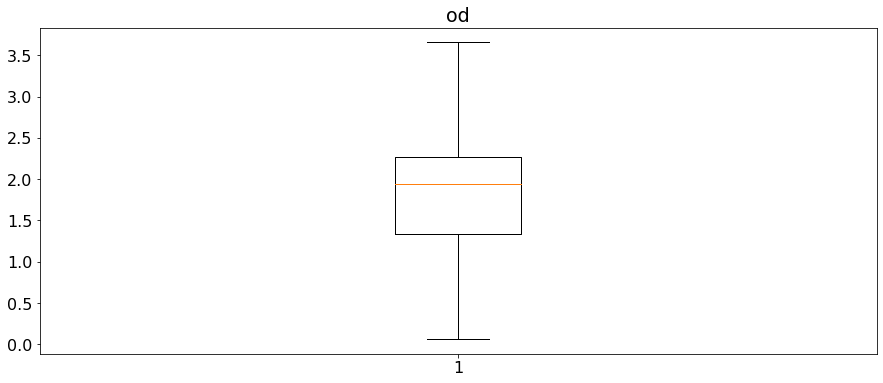

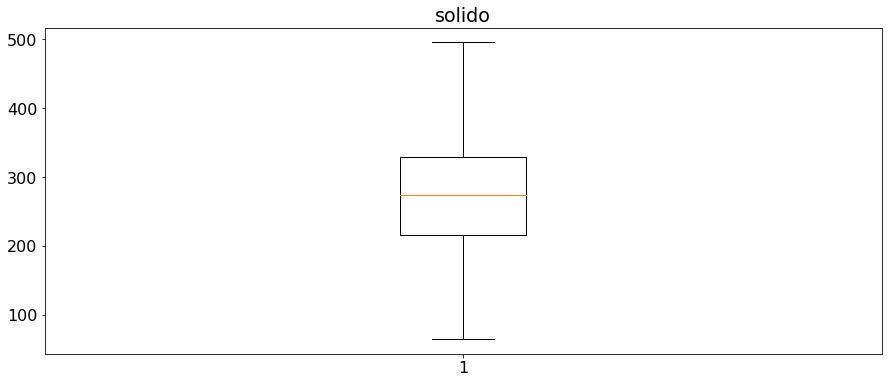

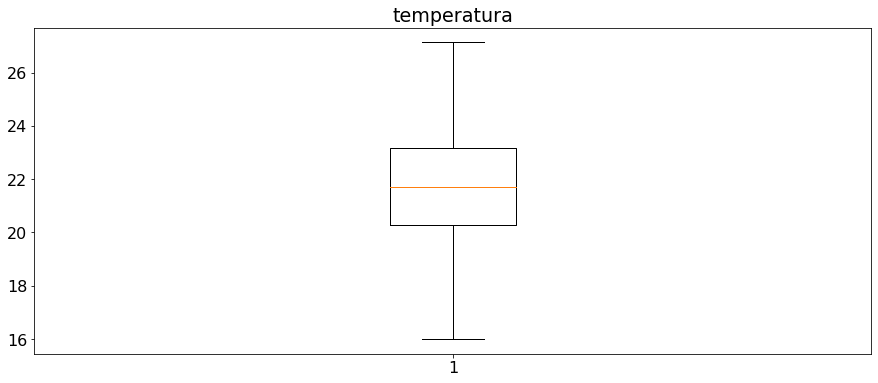

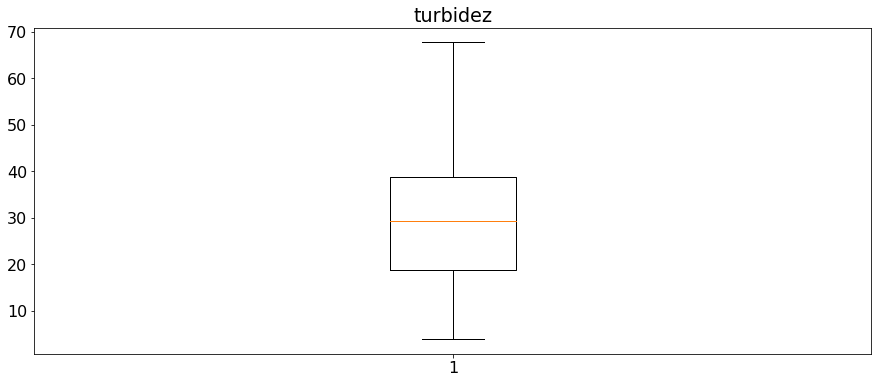

In [258]:
#O parâmetro OD não necessita de tratamento de outlier por não apresentar valores fora do padrão no boxplot da UGRHI 06
for i in ('ph','coliformes', 'dbo','fosforo','od','solido','temperatura','turbidez'):
    
    if (i == 'coliformes'):
        outs = outlier_superior(i,df06)[1]
        regs = len(df06[(df06.coliformes > outs)])
                
        outi = outlier_inferior(i,df06)[1]
        regi = len(df06[(df06.coliformes < outi)])
    
           
        while (regs > 0):
            df06.loc[df06[i] > outlier_superior(i,df06)[1],i] = df06.mean().coliformes
            outs = outlier_superior(i,df06)[1]
            regs = len(df06[(df06.coliformes > outs)]) 
        
        while (regi > 0):
            df06.loc[df06[i] < outlier_inferior(i,df06)[1],i] = df06.mean().coliformes
            outi = outlier_inferior(i,df06)[1]
            regi = len(df06[(df06.coliformes < outi)])
            
        media = df06.mean().coliformes
                        
    elif(i == 'dbo'):
        outs = outlier_superior(i,df06)[2]
        regs = len(df06[(df06.dbo > outs)])
        
        outi = outlier_inferior(i,df06)[2]
        regi = len(df06[(df06.dbo < outi)])
    
        while (regs > 0):
            df06.loc[df06[i] > outlier_superior(i,df06)[2],i] = df06.mean().dbo
            outs = outlier_superior(i,df06)[2]
            regs = len(df06[(df06.dbo > outs)])
        
        while (regi > 0):
            df06.loc[df06[i] < outlier_inferior(i,df06)[2],i] = df06.mean().dbo
            outi = outlier_inferior(i,df06)[2]
            regi = len(df06[(df06.dbo < outi)])
            
        media = df06.mean().dbo
                
    elif(i == 'fosforo'):
        
        outs = outlier_superior(i,df06)[3]
        regs = len(df06[(df06.fosforo > outs)])
        
        outi = outlier_inferior(i,df06)[3]
        regi = len(df06[(df06.fosforo < outi)])
    
        while (regs > 0):
            df06.loc[df06[i] > outlier_superior(i,df06)[3],i] = df06.mean().fosforo
            outs = outlier_superior(i,df06)[3]
            regs = len(df06[(df06.fosforo > outs)])
        
        while (regi > 0):
            df06.loc[df06[i] < outlier_inferior(i,df06)[3],i] = df06.mean().fosforo
            outi = outlier_inferior(i,df06)[3]
            regi = len(df06[(df06.fosforo < outi)])
            
        media = df06.mean().fosforo
                
    elif(i == 'ph'):
        
        outs = outlier_superior(i,df06)[0]
        regs = len(df06[(df06.ph > outs)])
        
        outi = outlier_inferior(i,df06)[0]
        regi = len(df06[(df06.ph < outi)])
    
        while (regs > 0):
            df06.loc[df06[i] > outlier_superior(i,df06)[0],i] = df06.mean().ph
            outs = outlier_superior(i,df06)[0]
            regs = len(df06[(df06.ph > outs)])
        
        while (regi > 0):
            df06.loc[df06[i] < outlier_inferior(i,df06)[0],i] = df06.mean().ph
            outi = outlier_inferior(i,df06)[0]
            regi = len(df06[(df06.ph < outi)])
            
        media = df06.mean().ph
                
    elif(i == 'solido'):
        
        outs = outlier_superior(i,df06)[5]
        regs = len(df06[(df06.solido > outs)])
        
        outi = outlier_inferior(i,df06)[5]
        regi = len(df06[(df06.solido < outi)])
    
        while (regs > 0):
            df06.loc[df06[i] > outlier_superior(i,df06)[5],i] = df06.mean().solido
            outs = outlier_superior(i,df06)[5]
            regs = len(df06[(df06.solido > outs)])
        
        while (regi > 0):
            df06.loc[df06[i] < outlier_inferior(i,df06)[5],i] = df06.mean().solido
            outi = outlier_inferior(i,df06)[5]
            regi = len(df06[(df06.solido < outi)])
            
        media = df06.mean().solido
                
    elif(i == 'temperatura'):
        
        outs = outlier_superior(i,df06)[6]
        regs = len(df06[(df06.temperatura > outs)])
        
        outi = outlier_inferior(i,df06)[6]
        regi = len(df06[(df06.temperatura < outi)])
    
        while (regs > 0):
            df06.loc[df06[i] > outlier_superior(i,df06)[6],i] = df06.mean().temperatura
            outs = outlier_superior(i,df06)[6]
            regs = len(df06[(df06.temperatura > outs)])
        
        while (regi > 0):
            df06.loc[df06[i] < outlier_inferior(i,df06)[6],i] = df06.mean().temperatura
            outi = outlier_inferior(i,df06)[6]
            regi = len(df06[(df06.temperatura < outi)])
            
        media = df06.mean().temperatura
        
    elif(i == 'od'):
        
        outs = outlier_superior(i,df06)[4]
        regs = len(df06[(df06.od > outs)])
        
        outi = outlier_inferior(i,df06)[4]
        regi = len(df06[(df06.od < outi)])
    
        while (regs > 0):
            df06.loc[df06[i] > outlier_superior(i,df06)[4],i] = df06.mean().od
            outs = outlier_superior(i,df06)[4]
            regs = len(df06[(df06.od > outs)])
        
        while (regi > 0):
            df06.loc[df06[i] < outlier_inferior(i,df06)[4],i] = df06.mean().od
            outi = outlier_inferior(i,df06)[4]
            regi = len(df06[(df06.od < outi)])
            
        media = df06.mean().od
                        
    else:
        
        
        outs = outlier_superior(i,df06)[7]
        regs = len(df06[(df06.turbidez > outs)])
        
        outi = outlier_inferior(i,df06)[7]
        regi = len(df06[(df06.turbidez < outi)])
    
        while (regs > 0):
            df06.loc[df06[i] > outlier_superior(i,df06)[7],i] = df06.mean().turbidez
            outs = outlier_superior(i,df06)[7]
            regs = len(df06[(df06.turbidez > outs)])
        
        while (regi > 0):
            df06.loc[df06[i] < outlier_inferior(i,df06)[7],i] = df06.mean().turbidez
            outi = outlier_inferior(i,df06)[7]
            regi = len(df06[(df06.turbidez < outi)])
            
        media = df06.mean().turbidez
             

#Mostra os outlier dos valores de cada parâmetro da UGRHI06 após redimensionamento semanal
print('Dados da UGRHI 06')
#Mostra os dados por parâmetro
for c in df06.columns:
    fig4,ax4 = plt.subplots()
    ax4.set_title(c)
    ax4.boxplot(df06[c])

UGRHI06 - APÓS SUBSTITUIÇÃO DOS OUTLIERS PELO VALOR MEDIO EM CADA PARÂMETRO


C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.7% 

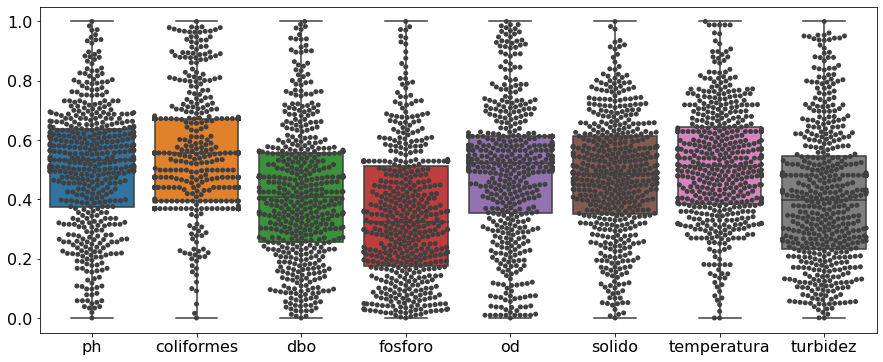

In [259]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
df06_padronizado = sc.fit_transform(df06)

ph          = []
coliformes  = []
dbo         = []
fosforo     = []
od          = []
solido      = []
temperatura = []
turbidez    = []

for i in range(0,8):#coluna
    for j in range(0,len(df06_padronizado)): #linha
        if (i == 0):
            ph.append(df06_padronizado[j][i]) 
        elif (i == 1):
            coliformes.append(df06_padronizado[j][i])
        elif (i == 2):
            dbo.append(df06_padronizado[j][i])
        elif (i == 3):
            fosforo.append(df06_padronizado[j][i])
        elif (i == 4):
            od.append(df06_padronizado[j][i])
        elif (i == 5):
            solido.append(df06_padronizado[j][i])
        elif (i == 6):
            temperatura.append(df06_padronizado[j][i])
        else:
            turbidez.append(df06_padronizado[j][i])

dict = {'ph':ph,'coliformes':coliformes,'dbo':dbo,'fosforo':fosforo,'od':od,'solido':solido,'temperatura':temperatura,'turbidez':turbidez}

df06_pad = pd.DataFrame(dict)
print("UGRHI06 - APÓS SUBSTITUIÇÃO DOS OUTLIERS PELO VALOR MEDIO EM CADA PARÂMETRO")
#ax = sns.violinplot(data=df06_pad,inner="point")
ax = sns.boxplot(data=df06_pad)
ax = sns.swarmplot(data=df06_pad, color=".25")
plt.rcParams["figure.figsize"] = (15,6)


In [260]:
df06.describe()

,ph,coliformes,dbo,fosforo,od,solido,temperatura,turbidez
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,6.822614,5.923073,24.379465,0.954244,1.829891,271.400982,21.748827,30.090638
std,0.338123,0.152323,11.967171,0.580706,0.803061,84.825626,2.122615,14.683470
min,5.968750,5.478615,1.666667,0.036667,0.066667,64.666667,16.000000,3.966667
25%,6.600000,5.791289,15.627137,0.506500,1.333333,216.388889,20.263889,18.902877
50%,6.862500,5.919975,24.000000,0.894100,1.947463,274.452179,21.714286,29.400000
75%,7.042598,6.011920,32.105284,1.395952,2.263974,328.704545,23.166667,38.836477
max,7.650000,6.271798,56.416667,2.697222,3.653851,495.333333,27.130000,67.733333


UGRHI06


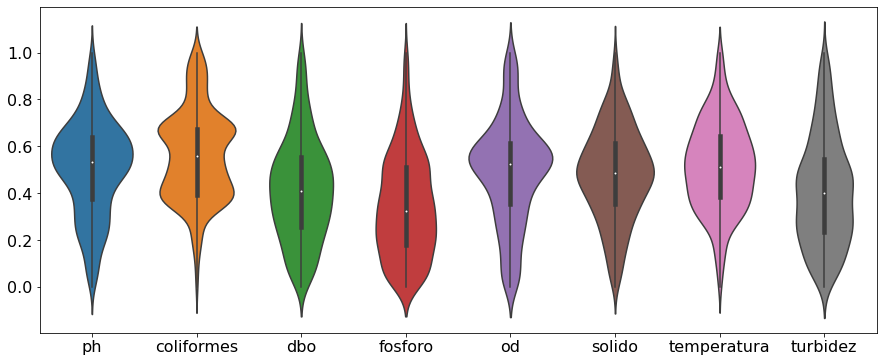

In [261]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
df06_padronizado = sc.fit_transform(df06)

ph          = []
coliformes  = []
dbo         = []
fosforo     = []
od          = []
solido      = []
temperatura = []
turbidez    = []

for i in range(0,8):#coluna
    for j in range(0,len(df06_padronizado)): #linha
        if (i == 0):
            ph.append(df06_padronizado[j][i]) 
        elif (i == 1):
            coliformes.append(df06_padronizado[j][i])
        elif (i == 2):
            dbo.append(df06_padronizado[j][i])
        elif (i == 3):
            fosforo.append(df06_padronizado[j][i])
        elif (i == 4):
            od.append(df06_padronizado[j][i])
        elif (i == 5):
            solido.append(df06_padronizado[j][i])
        elif (i == 6):
            temperatura.append(df06_padronizado[j][i])
        else:
            turbidez.append(df06_padronizado[j][i])

dict = {'ph':ph,'coliformes':coliformes,'dbo':dbo,'fosforo':fosforo,'od':od,'solido':solido,'temperatura':temperatura,'turbidez':turbidez}

df06_pad = pd.DataFrame(dict)
print("UGRHI06")
ax = sns.violinplot(data=df06_pad)
plt.rcParams["figure.figsize"] = (15,6)


In [262]:
df06.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,ph,coliformes,dbo,fosforo,od,solido,temperatura,turbidez
ph,1.0,0.21,0.53,0.5,-0.3,0.49,0.14,-0.011
coliformes,0.21,1.0,0.24,0.23,-0.066,0.23,0.092,0.12
dbo,0.53,0.24,1.0,0.68,-0.26,0.63,-0.017,0.13
fosforo,0.5,0.23,0.68,1.0,-0.22,0.61,-0.0057,0.16
od,-0.3,-0.066,-0.26,-0.22,1.0,-0.33,-0.22,-0.055
solido,0.49,0.23,0.63,0.61,-0.33,1.0,0.091,0.38
temperatura,0.14,0.092,-0.017,-0.0057,-0.22,0.091,1.0,0.085
turbidez,-0.011,0.12,0.13,0.16,-0.055,0.38,0.085,1.0


In [263]:
df06.to_csv (r'C:\Users\Anderson\predicaoagua\src\src_experimentos_dissertação_log\Concatenacao_dados_cetesb\nova_concatenacao\dados_processados_ugrhi06.csv', index = True, header=True)